In [1]:
import numpy as np
from keras.layers.core import Dense, Activation, Dropout
from keras.layers import LSTM
from keras.models import Sequential, load_model
from keras.callbacks import Callback
import keras.backend.tensorflow_backend as KTF
import tensorflow as tf
import pandas as pd
import os
import  keras.callbacks
import matplotlib.pyplot as plt
 
#设定为自增长
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)
KTF.set_session(session)

Using TensorFlow backend.


In [2]:
data = pd.read_csv('./taxi_6275_clean.csv')
data.head()

,date,longitude,latitude,date_diff,dis,v,angles,time_diff_num
0,2008-02-02 13:30:44,116.36838,39.90484,0 days 00:00:00.000000000,0.0,0.0,0.0,0.0
1,2008-02-02 13:30:45,116.36838,39.90484,0 days 00:00:01.000000000,0.0,0.0,0.0,1.0
2,2008-02-02 13:30:46,116.36838,39.90484,0 days 00:00:01.000000000,0.0,0.0,0.0,1.0
3,2008-02-02 13:30:47,116.36838,39.90484,0 days 00:00:01.000000000,0.0,0.0,0.0,1.0
4,2008-02-02 13:30:48,116.36838,39.90484,0 days 00:00:01.000000000,0.0,0.0,0.0,1.0


In [3]:
data_selected = data[['longitude','latitude','v','angles','time_diff_num']]

In [4]:
data_selected.head()

,longitude,latitude,v,angles,time_diff_num
0,116.36838,39.90484,0.0,0.0,0.0
1,116.36838,39.90484,0.0,0.0,1.0
2,116.36838,39.90484,0.0,0.0,1.0
3,116.36838,39.90484,0.0,0.0,1.0
4,116.36838,39.90484,0.0,0.0,1.0


In [5]:
data_selected.shape

(147939, 5)

In [6]:
time_diff_num = data_selected.time_diff_num.values

In [7]:
sorted(time_diff_num, reverse=True)[:80]

[57399.0,
 53301.0,
 46959.0,
 41637.0,
 39201.0,
 38661.0,
 4043.0000000000014,
 1021.0,
 911.0,
 702.0,
 631.0,
 488.00000000000006,
 487.00000000000006,
 486.00000000000006,
 485.00000000000006,
 475.00000000000006,
 445.0,
 442.0,
 430.0,
 414.0,
 381.0,
 358.0,
 340.0,
 323.0,
 319.0,
 310.0,
 308.0,
 296.0,
 295.0,
 280.0,
 275.0,
 256.0,
 238.00000000000003,
 235.00000000000003,
 233.00000000000003,
 229.00000000000003,
 228.0,
 225.0,
 216.0,
 210.0,
 209.0,
 203.0,
 203.0,
 202.0,
 202.0,
 201.0,
 200.0,
 165.0,
 153.0,
 152.0,
 150.0,
 150.0,
 148.0,
 146.0,
 146.0,
 145.0,
 145.0,
 145.0,
 144.0,
 144.0,
 144.0,
 144.0,
 144.0,
 143.0,
 143.0,
 143.0,
 142.0,
 142.0,
 142.0,
 141.0,
 132.0,
 119.0,
 112.0,
 112.0,
 112.0,
 99.0,
 89.0,
 89.0,
 85.0,
 85.0]

In [8]:
v = data_selected.v.values
sorted(v, reverse=True)[-51000 : -1]

[0.1009090908694206,
 0.1009090908694206,
 0.1009090908694206,
 0.1009090908694206,
 0.09444444460863603,
 0.0944444444744224,
 0.0944444444744224,
 0.09444444434020877,
 0.09444444420599514,
 0.09250000002936076,
 0.09249999996363556,
 0.08737938109180057,
 0.08500000014777243,
 0.08500000014777243,
 0.08338516681785323,
 0.07928571425454478,
 0.07727272729725469,
 0.07727272729725469,
 0.07727272729725469,
 0.07727272718744355,
 0.07727272718744355,
 0.07727272718744355,
 0.0740000000234886,
 0.07399999997090842,
 0.07391304355424025,
 0.0739130434492035,
 0.0708796338882802,
 0.0708333333558168,
 0.0708333333558168,
 0.06788066379860024,
 0.06538461540536936,
 0.06529411762138981,
 0.06071428581983745,
 0.06071428573355725,
 0.05825292075395836,
 0.05666666676518161,
 0.0531250000168626,
 0.052857142836363176,
 0.05214903543672497,
 0.05045454543471031,
 0.04614308054977943,
 0.04236576055161222,
 0.036956521803379314,
 0.0336363636231402,
 0.032821283083571975,
 0.03264705883389203

In [9]:
data[data.time_diff_num>200]

,date,longitude,latitude,date_diff,dis,v,angles,time_diff_num
2838,2008-02-02 14:53:40,116.42808,39.85975,0 days 00:03:23.000000000,1267.783543,6.245239,147.317392,203.0
3484,2008-02-02 16:18:35,116.41158,39.84342,0 days 01:07:23.000000000,46.854161,0.011589,154.130070,4043.0
8029,2008-02-02 18:59:15,116.46610,39.92944,0 days 00:08:07.000000000,1562.413406,3.208241,258.961688,487.0
13434,2008-02-02 21:44:44,116.41566,39.85728,0 days 00:04:56.000000000,2044.698318,6.907765,178.041728,296.0
13701,2008-02-03 08:42:00,116.41018,39.84375,0 days 10:44:21.000000000,24.434789,0.000632,178.001203,38661.0
14222,2008-02-03 09:04:27,116.36729,39.86885,0 days 00:05:08.000000000,3405.357243,11.056355,271.951070,308.0
18739,2008-02-03 11:22:11,116.30964,39.97986,0 days 00:05:19.000000000,63.144378,0.197945,84.960616,319.0
25638,2008-02-03 14:33:09,116.35739,39.93541,0 days 00:05:23.000000000,16.844138,0.052149,351.281402,323.0
26379,2008-02-03 15:01:16,116.35930,39.91261,0 days 00:03:53.000000000,690.629970,2.964077,71.857734,233.0
26380,2008-02-03 15:04:39,116.36772,39.91072,0 days 00:03:23.000000000,745.813874,3.673960,106.308925,203.0


In [10]:
data_selected_train = data_selected.iloc[:130450]
data_selected_test = data_selected.iloc[130450:]

In [11]:
data_selected.loc[13701].v=0
data_selected.loc[13701].time_diff_num=0
data_selected.loc[38926].v=0
data_selected.loc[38926].time_diff_num=0
data_selected.loc[65203].v=0
data_selected.loc[65203].time_diff_num=0
data_selected.loc[89881].v=0
data_selected.loc[89881].time_diff_num=0
data_selected.loc[112494].v=0
data_selected.loc[112494].time_diff_num=0
data_selected.loc[130450].v=0
data_selected.loc[130450].time_diff_num=0

In [12]:
data_selected.loc[3484].v=data_selected.loc[3484].v/10
data_selected.loc[3484].time_diff_num=data_selected.loc[3484].time_diff_num/10

In [13]:
data_selected.loc[3484]

longitude        116.411580
latitude          39.843420
v                  0.001159
angles           154.130070
time_diff_num    404.300000
Name: 3484, dtype: float64

In [14]:
def tongjitu(taxi_data):
    t = np.arctan2(taxi_data['longitude'].values, taxi_data['latitude'].values)
    plt.scatter(taxi_data['longitude'].values, taxi_data['latitude'].values, s=75, c=t, alpha=0.5)
    plt.xlabel("longitude")
    plt.ylabel("latitude")
    plt.show()

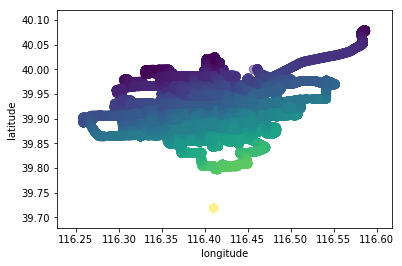

In [15]:
tongjitu(data_selected)

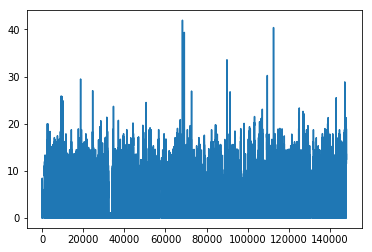

In [16]:
import seaborn as sns
ax = sns.lineplot(data=data_selected['v'])
plt.show()

In [17]:
data[data.latitude<39.75]

,date,longitude,latitude,date_diff,dis,v,angles,time_diff_num
89880,2008-02-05 21:44:38,116.4105,39.7188,0 days 00:06:54.000000000,13887.215099,33.543998,179.950683,414.0


In [18]:
data_selected[data_selected.time_diff_num>1000]

,longitude,latitude,v,angles,time_diff_num
77221,116.37375,39.96559,0.363545,168.766236,1021.0


In [19]:
data_selected.time_diff_num.values.mean()

1.7068812145546475

In [20]:
 data_selected.values[:10]

array([[116.36838,  39.90484,   0.     ,   0.     ,   0.     ],
       [116.36838,  39.90484,   0.     ,   0.     ,   1.     ],
       [116.36838,  39.90484,   0.     ,   0.     ,   1.     ],
       [116.36838,  39.90484,   0.     ,   0.     ,   1.     ],
       [116.36838,  39.90484,   0.     ,   0.     ,   1.     ],
       [116.36838,  39.90484,   0.     ,   0.     ,   1.     ],
       [116.36838,  39.90484,   0.     ,   0.     ,   1.     ],
       [116.36838,  39.90484,   0.     ,   0.     ,   1.     ],
       [116.36838,  39.90484,   0.     ,   0.     ,   3.     ],
       [116.36838,  39.90484,   0.     ,   0.     ,   2.     ]])

In [21]:
data_selected_train.head()

,longitude,latitude,v,angles,time_diff_num
0,116.36838,39.90484,0.0,0.0,0.0
1,116.36838,39.90484,0.0,0.0,1.0
2,116.36838,39.90484,0.0,0.0,1.0
3,116.36838,39.90484,0.0,0.0,1.0
4,116.36838,39.90484,0.0,0.0,1.0


In [26]:
sssss = data_selected_train.values[:4]

样本数：130450，维度：5


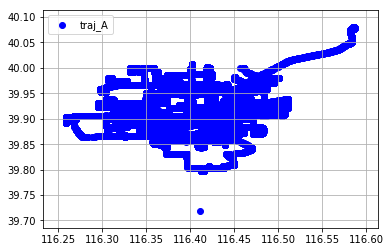

x
 (130434, 14, 5)
y
 (130434, 2)
Epoch 1/8
130434/130434 [==============================] - 165s 1ms/step - loss: 0.0018 - acc: 0.9471
Epoch 2/8
130434/130434 [==============================] - 183s 1ms/step - loss: 4.2198e-04 - acc: 0.9706 1s - loss: 4.2380e-04 - acc:  - ETA: 1s - loss: 4.2323e-04 
Epoch 3/8
130434/130434 [==============================] - 189s 1ms/step - loss: 1.9982e-04 - acc: 0.9762A: 2:27 - loss: 2.2976e-04 - acc: 0 - ETA: 2:22 - loss: 2.2625e-04 - acc: 0 - ETA: 2:18 - loss: 2.2495e-04 - acc:  - ETA: 2:17 - loss: 2.2475e-04 - a - ETA: 2:13 -  - ETA: 2:01 - loss: 2.2025e-04 - acc: 0 - ETA: 2:01 - loss: 2.2008e-0 - ETA: 1:47 - loss: 2.1824e-04 - a - ETA: 1:46 - loss: 2.1785e-04 - acc: 0 - ETA: 1:46 - loss: 2.1769e -  - ETA: 8s - loss: 2.0078e-04 - acc: 0 - ETA: 8s - loss: 2.0069e-04 - acc: - ETA: 7s - loss: 2.0062e-04  - ETA: 6s - los - ETA: 3s - loss: 2.0018e-04 - acc: 0 - ETA: 3s - loss: 2.0016e-04 - acc - ETA: 2s - loss: 2.0016e-04 - acc:  - ETA: 2s - loss:
Epoc

130434/130434 [==============================] - 205s 2ms/step - loss: 1.8073e-04 - acc: 0.9780- ETA: 3:13 - l - ETA: 3:10 - loss: 2.0164e-04 - acc: 0.9 - ETA: 3:10 - loss: 2.0044e-04 - acc:  - ETA: 3:10 - loss: 1.9888e-04 - a - ETA: 3:09 - loss: 1.9610e-04 -  - ET - ETA: 3:05 - loss: 1.8455e-04 - acc: - ETA: 3:04 - loss: 1.8362e-04 - acc: 0. - ETA: 3:04 - lo - ETA: 3:02 - loss: - ETA: 3:00 - ETA: 2:43 - loss: 1.8233e-04 - - ETA: 2:42 - loss: 1.8172e-04  - ETA: 2:37 - loss: 1.7946 - ETA: 2:36 - loss: 1.8027e-04 - acc: 0 - ETA: 2:35 -  - ETA: 2:29 - loss: 1.8199e-04 - acc: 0 - ETA: 2:28 - ETA: 2:25 - loss: 1.8089e-04 - acc:  - ETA: 2:24 - loss: 1.8158e-04 -  - ETA: 2:23 - loss: 1.8171e-04 - acc: 0.978 - ETA: 2:23 - loss: 1.8172e-04 -  - ETA: 2:18 - loss: 1.829 - ETA: 2:16 - loss: 1.8289e-04 - acc - ETA: 2:15 - l - ETA: 2:12 - loss: 1.8202e-04  - ETA: 2:11 - loss: 1.8165e-04 - acc: 0 - ETA: 2:11 - loss: 1.8124e-04 - ac - ET - ETA: 2:01 - - ETA: 1:58 - loss: 1.7974e-04 - acc  - ETA: 1:53 

In [27]:
def create_dataset(data,n_predictions,n_next):
    '''
    对数据进行处理
    '''
    dim = data.shape[1]-3
    train_X, train_Y = [], []
    for i in range(data.shape[0]-n_predictions-n_next-1):
        a = data[i:(i+n_predictions), :]
        train_X.append(a)
        tempb = data[(i+n_predictions):(i+n_predictions+n_next), :]
        b = []
        for j in range(len(tempb)):
            for k in range(dim):
                b.append(tempb[j, k])
        train_Y.append(b)
    train_X = np.array(train_X, dtype='float64')
    train_Y = np.array(train_Y, dtype='float64')
 
    return train_X, train_Y
 

def NormalizeMult(data, set_range):
    '''
    返回归一化后的数据和最大最小值
    '''
    normalize = np.arange(2*data.shape[1], dtype='float64')
    normalize = normalize.reshape(data.shape[1], 2)
 
    for i in range(0, data.shape[1]):
        if set_range == True:
            list = data[:, i]
            listlow, listhigh = np.percentile(list, [0, 100])
        else:
            if i == 0:
                listlow = -90
                listhigh = 90
            else:
                listlow = -180
                listhigh = 180
 
        normalize[i, 0] = listlow
        normalize[i, 1] = listhigh
 
        delta = listhigh - listlow
        if delta != 0:
            for j in range(0, data.shape[0]):
                data[j, i] = (data[j, i] - listlow)/delta
 
    return data, normalize

def trainModel(train_X, train_Y):
    '''
    trainX，trainY: 训练LSTM模型所需要的数据
    '''
    model = Sequential()
    model.add(LSTM(
        120,
        input_shape=(train_X.shape[1], train_X.shape[2]),
        return_sequences=True))
    model.add(Dropout(0.3))
 
    model.add(LSTM(
        120,
        return_sequences=False))
    model.add(Dropout(0.3))
 
    model.add(Dense(
        train_Y.shape[1]))
    model.add(Activation("relu"))
 
    model.compile(loss='mse', optimizer='adam', metrics=['acc'])
    model.fit(train_X, train_Y, epochs=8, batch_size=64, verbose=1)
    model.summary()
 
    return model

if __name__ == "__main__":
    train_num = 14
    per_num = 1
    # set_range = False
    set_range = True
 
    # 读入时间序列的文件数据
    data = data_selected_train.values.copy()
    #data1 = data_selected_test.values
    #pd.read_csv('20080403010747.txt', sep=',').iloc[:, 0:2].values
    print("样本数：{0}，维度：{1}".format(data.shape[0], data.shape[1]))
    # print(data)
 
    # 画样本数据库
    plt.scatter(data[:, 0], data[:, 1], c='b', marker='o', label='traj_A')
    plt.legend(loc='upper left')
    plt.grid()
    plt.show()
 
    #归一化
    data, normalize = NormalizeMult(data, set_range)
    # print(normalize)
 
    #生成训练数据
    train_X, train_Y = create_dataset(data, train_num, per_num)
    print("x\n", train_X.shape)
    print("y\n", train_Y.shape)
 
  
    # 训练模型
    model = trainModel(train_X, train_Y)
    loss, acc = model.evaluate(train_X, train_Y, verbose=2)
    print('Loss : {}, Accuracy: {}'.format(loss, acc * 100))
 
    # 保存模型
    np.save("./traj_model_trueNorm.npy", normalize)
    model.save("./traj_model_120.h5")

In [28]:
data_selected_test.head()

,longitude,latitude,v,angles,time_diff_num
130450,116.41036,39.8439,0.0,217.516806,0.0
130451,116.41036,39.8439,0.0,0.000000,1.0
130452,116.41036,39.8439,0.0,0.000000,1.0
130453,116.41036,39.8439,0.0,0.000000,1.0
130454,116.41036,39.8439,0.0,0.000000,1.0


In [29]:
data_selected_train.head()

,longitude,latitude,v,angles,time_diff_num
0,116.36838,39.90484,0.0,0.0,0.0
1,116.36838,39.90484,0.0,0.0,1.0
2,116.36838,39.90484,0.0,0.0,1.0
3,116.36838,39.90484,0.0,0.0,1.0
4,116.36838,39.90484,0.0,0.0,1.0


(1, 2) [[0.5259447 0.6170879]]
[[0.52594471 0.6170879 ]]
listlow, listhigh, delta 116.25851000000002 116.58676 0.32824999999998283
listlow, listhigh, delta 39.7188 40.07991 0.3611099999999965
predict: [[116.43115135  39.94163661]]
true：[[116.4275   39.94579]]
预测均方误差： 1.5291498777950433e-05
预测直线距离：0.4551 KM


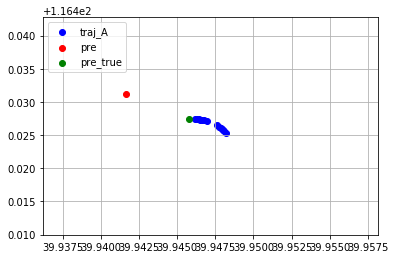

(1, 2) [[0.52628005 0.61661667]]
[[0.52628005 0.61661667]]
listlow, listhigh, delta 116.25851000000002 116.58676 0.32824999999998283
listlow, listhigh, delta 39.7188 40.07991 0.3611099999999965
predict: [[116.43126142  39.94146644]]
true：[[116.42749  39.94548]]
预测均方误差： 1.516613741574571e-05
预测直线距离：0.4640 KM


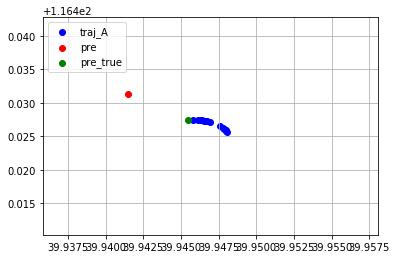

(1, 2) [[0.526441   0.61609256]]
[[0.52644098 0.61609256]]
listlow, listhigh, delta 116.25851000000002 116.58676 0.32824999999998283
listlow, listhigh, delta 39.7188 40.07991 0.3611099999999965
predict: [[116.43131425  39.94127719]]
true：[[116.42748  39.94525]]
预测均方误差： 1.5242368827535657e-05
预测直线距离：0.4695 KM


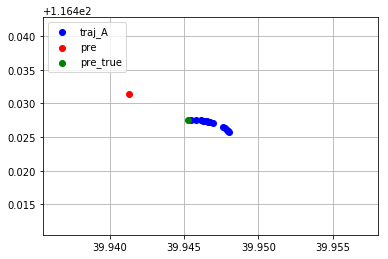

(1, 2) [[0.52659917 0.6155531 ]]
[[0.52659917 0.61555308]]
listlow, listhigh, delta 116.25851000000002 116.58676 0.32824999999998283
listlow, listhigh, delta 39.7188 40.07991 0.3611099999999965
predict: [[116.43136618  39.94108237]]
true：[[116.42747  39.94512]]
预测均方误差： 1.5741313717795594e-05
预测直线距离：0.4771 KM


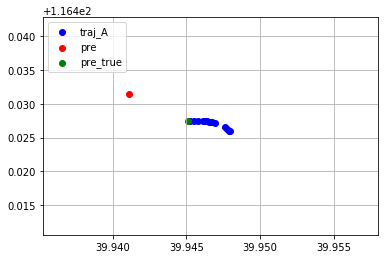

(1, 2) [[0.5268081  0.61502093]]
[[0.52680808 0.61502093]]
listlow, listhigh, delta 116.25851000000002 116.58676 0.32824999999998283
listlow, listhigh, delta 39.7188 40.07991 0.3611099999999965
predict: [[116.43143475  39.94089021]]
true：[[116.42746  39.94499]]
预测均方误差： 1.6303477706862623e-05
预测直线距离：0.4863 KM


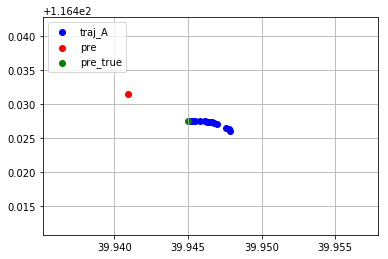

(1, 2) [[0.5269804 0.6144995]]
[[0.5269804  0.61449951]]
listlow, listhigh, delta 116.25851000000002 116.58676 0.32824999999998283
listlow, listhigh, delta 39.7188 40.07991 0.3611099999999965
predict: [[116.43149132  39.94070192]]
true：[[116.42746  39.94486]]
预测均方误差： 1.6770579393683832e-05
预测直线距离：0.4932 KM


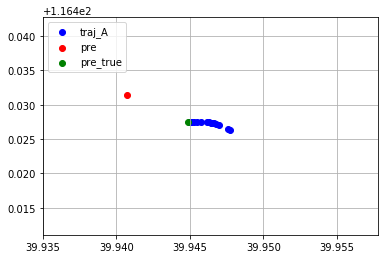

(1, 2) [[0.52709174 0.6139915 ]]
[[0.52709174 0.6139915 ]]
listlow, listhigh, delta 116.25851000000002 116.58676 0.32824999999998283
listlow, listhigh, delta 39.7188 40.07991 0.3611099999999965
predict: [[116.43152786  39.94051847]]
true：[[116.42742  39.94418]]
预测均方误差： 1.5140674303898102e-05
预测直线距离：0.4914 KM


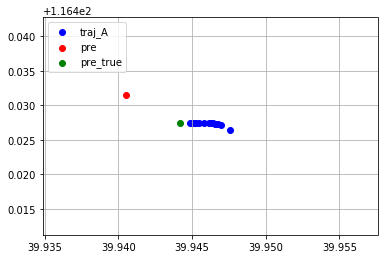

(1, 2) [[0.5272014 0.6133842]]
[[0.52720141 0.61338419]]
listlow, listhigh, delta 116.25851000000002 116.58676 0.32824999999998283
listlow, listhigh, delta 39.7188 40.07991 0.3611099999999965
predict: [[116.43156386  39.94029916]]
true：[[116.42741  39.94375]]
预测均方误差： 1.4581428892790306e-05
预测直线距离：0.4925 KM


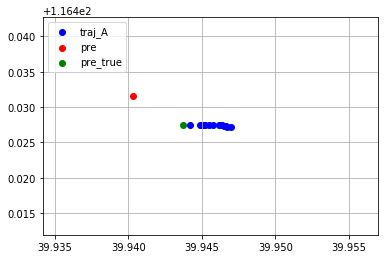

(1, 2) [[0.52733207 0.61265284]]
[[0.52733207 0.61265284]]
listlow, listhigh, delta 116.25851000000002 116.58676 0.32824999999998283
listlow, listhigh, delta 39.7188 40.07991 0.3611099999999965
predict: [[116.43160675  39.94003507]]
true：[[116.4274   39.94361]]
预测均方误差： 1.523845270836051e-05
预测直线距离：0.5001 KM


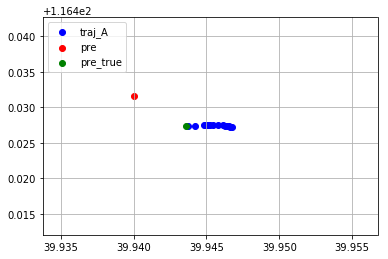

(1, 2) [[0.52740824 0.6118671 ]]
[[0.52740824 0.61186707]]
listlow, listhigh, delta 116.25851000000002 116.58676 0.32824999999998283
listlow, listhigh, delta 39.7188 40.07991 0.3611099999999965
predict: [[116.43163176  39.93975132]]
true：[[116.4274   39.94347]]
预测均方误差： 1.5868176303318554e-05
预测直线距离：0.5053 KM


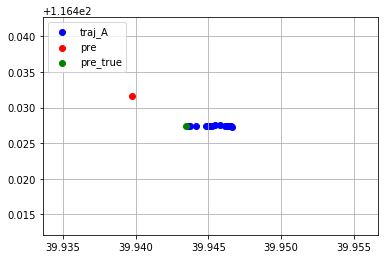

In [34]:
import numpy as np
from keras.layers.core import Dense, Activation, Dropout
from keras.layers import LSTM
from keras.models import Sequential, load_model
from keras.callbacks import Callback
import keras.backend.tensorflow_backend as KTF
import tensorflow as tf
import  pandas as pd
import  os
import  keras.callbacks
import matplotlib.pyplot as plt
import copy
 
#设定为自增长
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)
KTF.set_session(session)
 
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
def mse(predictions, targets):
    return ((predictions - targets) ** 2).mean()
 
def reshape_y_hat(y_hat,dim):
    re_y = []
    i = 0
    while i < len(y_hat):
        tmp = []
        for j in range(dim):
            tmp.append(y_hat[i+j])
        i = i + dim
        re_y.append(tmp)
    re_y = np.array(re_y, dtype='float64')
    return re_y
 
#多维反归一化
def FNormalizeMult(data,normalize):
 
    data = np.array(data, dtype='float64')
    #列
    for i in range(0, data.shape[1]):
        listlow = normalize[i, 0]
        listhigh = normalize[i, 1]
        delta = listhigh - listlow
        print("listlow, listhigh, delta", listlow, listhigh, delta)
        #行
        if delta != 0:
            for j in range(0, data.shape[0]):
                data[j, i] = data[j, i]*delta + listlow
 
    return data
 
#使用训练数据的归一化
def NormalizeMultUseData(data,normalize):
 
    for i in range(0, data.shape[1]):
 
        listlow = normalize[i, 0]
        listhigh = normalize[i, 1]
        delta = listhigh - listlow
 
        if delta != 0:
            for j in range(0, data.shape[0]):
                data[j, i] = (data[j, i] - listlow)/delta
 
    return data
 
from math import sin, asin, cos, radians, fabs, sqrt
 
EARTH_RADIUS = 6371  # 地球平均半径，6371km
 
# 计算两个经纬度之间的直线距离
def hav(theta):
    s = sin(theta / 2)
    return s * s
def get_distance_hav(lat0, lng0, lat1, lng1):
    # "用haversine公式计算球面两点间的距离。"
    # 经纬度转换成弧度
    lat0 = radians(lat0)
    lat1 = radians(lat1)
    lng0 = radians(lng0)
    lng1 = radians(lng1)
 
    dlng = fabs(lng0 - lng1)
    dlat = fabs(lat0 - lat1)
    h = hav(dlat) + cos(lat0) * cos(lat1) * hav(dlng)
    distance = 2 * EARTH_RADIUS * asin(sqrt(h))
    return distance
 
if __name__ == '__main__':
    test_num = 14
    per_num = 1
    model = load_model("./traj_model_120.h5")
    for i in range(10):
        data_all = data_selected_test.iloc[-3*(test_num+per_num)+i:-2*(test_num+per_num)+i, 0:].values
        data_all.dtype = 'float64'
 
        data = copy.deepcopy(data_all[:-per_num, :])
        y = data_all[-per_num:, :2]
  
        # #归一化
        normalize = np.load("./traj_model_trueNorm.npy")
        data = NormalizeMultUseData(data, normalize)
 
        test_X = data.reshape(1, data.shape[0], data.shape[1])
        y_hat = model.predict(test_X)
        print(y_hat.shape,y_hat)
        y_hat = y_hat.reshape(y_hat.shape[1])
        y_hat = reshape_y_hat(y_hat, 2)
        print(y_hat)
 
        #反归一化
        y_hat = FNormalizeMult(y_hat, normalize)
        print("predict: {0}\ntrue：{1}".format(y_hat, y))
        print('预测均方误差：', mse(y_hat, y))
        print('预测直线距离：{:.4f} KM'.format(get_distance_hav(y_hat[0, 0], y_hat[0, 1], y[0, 0], y[0, 1])))
   
        # 画测试样本数据库
        p1 = plt.scatter(data_all[:-per_num, 1], data_all[:-per_num, 0], c='b', marker='o', label='traj_A')
        p2 = plt.scatter(y_hat[:, 1], y_hat[:, 0], c='r', marker='o', label='pre')
        p3 = plt.scatter(y[:, 1], y[:, 0], c='g', marker='o', label='pre_true')
        plt.legend(loc='upper left')
        plt.grid()
        plt.show()

In [ ]:
data_selected_train.tail()